In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

print("Path to dataset files:", path)

100%|██████████| 12.4k/12.4k [00:00<00:00, 16.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/redwankarimsony/heart-disease-data/versions/6



Column Names in the Dataset:
['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

Using 'num' as the target column.

Numeric Columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

Model Accuracy:
Accuracy: 61.96%

Confusion Matrix:


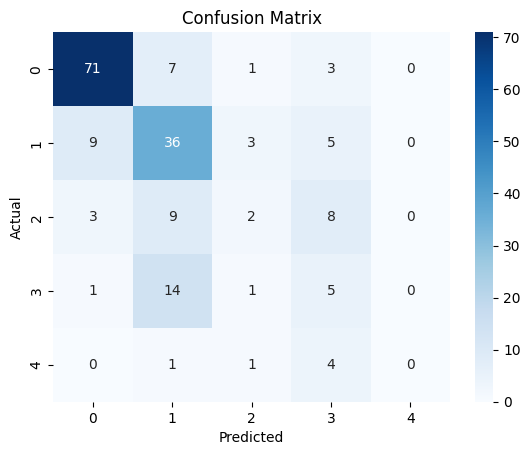


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        82
           1       0.54      0.68      0.60        53
           2       0.25      0.09      0.13        22
           3       0.20      0.24      0.22        21
           4       0.00      0.00      0.00         6

    accuracy                           0.62       184
   macro avg       0.37      0.37      0.36       184
weighted avg       0.58      0.62      0.59       184



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Display column names to identify the target column
print("\nColumn Names in the Dataset:")
print(heart_data.columns.tolist())

# Identify the target column
target_col = "num"  # Based on your dataset structure
print(f"\nUsing '{target_col}' as the target column.")

# Separate features (X) and target variable (y)
X = heart_data.drop(target_col, axis=1)
y = heart_data[target_col]

# Identify numeric and categorical columns
numeric_columns = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_columns = X.select_dtypes(include=["object"]).columns.tolist()
print(f"\nNumeric Columns: {numeric_columns}")
print(f"Categorical Columns: {categorical_columns}")

# Preprocessing for numeric data: Impute missing values with median and standardize
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Preprocessing for categorical data: One-hot encode
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_columns),
        ("cat", categorical_transformer, categorical_columns)
    ]
)

# Create a pipeline with preprocessing and logistic regression
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(random_state=42, max_iter=1000))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Model Evaluation
print("\nModel Accuracy:")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Column Names in the Dataset:
['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

Using 'num' as the target column.

Numeric Columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



Class distribution after SMOTE:
num
0    411
2    411
1    411
3    411
4    411
Name: count, dtype: int64

Random Forest - Model Accuracy:
Accuracy: 85.89%

Random Forest - Confusion Matrix:


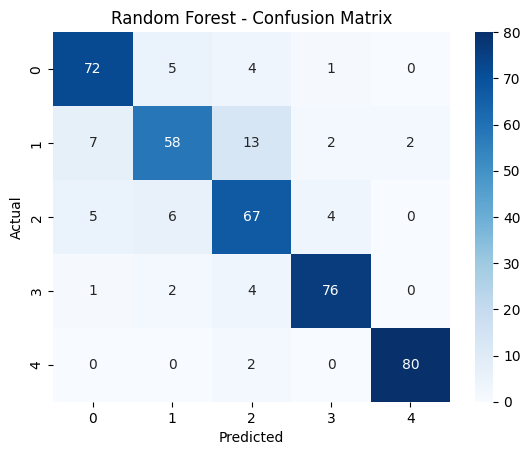


Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        82
           1       0.82      0.71      0.76        82
           2       0.74      0.82      0.78        82
           3       0.92      0.92      0.92        83
           4       0.98      0.98      0.98        82

    accuracy                           0.86       411
   macro avg       0.86      0.86      0.86       411
weighted avg       0.86      0.86      0.86       411


Gradient Boosting - Model Accuracy:
Accuracy: 76.16%

Gradient Boosting - Confusion Matrix:


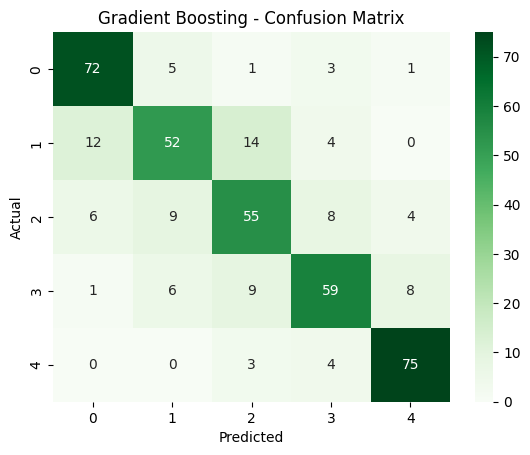


Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        82
           1       0.72      0.63      0.68        82
           2       0.67      0.67      0.67        82
           3       0.76      0.71      0.73        83
           4       0.85      0.91      0.88        82

    accuracy                           0.76       411
   macro avg       0.76      0.76      0.76       411
weighted avg       0.76      0.76      0.76       411



In [14]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE



# Display column names to identify the target column
print("\nColumn Names in the Dataset:")
print(heart_data.columns.tolist())

# Identify the target column
target_col = "num"  # Based on your dataset structure
print(f"\nUsing '{target_col}' as the target column.")

# Separate features (X) and target variable (y)
X = heart_data.drop(target_col, axis=1)
y = heart_data[target_col]

# Identify numeric and categorical columns
numeric_columns = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_columns = X.select_dtypes(include=["object"]).columns.tolist()
print(f"\nNumeric Columns: {numeric_columns}")
print(f"Categorical Columns: {categorical_columns}")

# Preprocessing for numeric data: Impute missing values with median and standardize
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Preprocessing for categorical data: Impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_columns),
        ("cat", categorical_transformer, categorical_columns)
    ]
)

# Apply preprocessing to the data
X_processed = preprocessor.fit_transform(X)

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y)

print("\nClass distribution after SMOTE:")
print(y_resampled.value_counts())

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

# Model Evaluation: Random Forest
print("\nRandom Forest - Model Accuracy:")
print(f"Accuracy: {accuracy_score(y_test, rf_y_pred) * 100:.2f}%")

print("\nRandom Forest - Confusion Matrix:")
conf_matrix_rf = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, rf_y_pred))

# Model Evaluation: Gradient Boosting
print("\nGradient Boosting - Model Accuracy:")
print(f"Accuracy: {accuracy_score(y_test, gb_y_pred) * 100:.2f}%")

print("\nGradient Boosting - Confusion Matrix:")
conf_matrix_gb = confusion_matrix(y_test, gb_y_pred)
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Greens")
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nGradient Boosting - Classification Report:")
print(classification_report(y_test, gb_y_pred))
